<a href="https://colab.research.google.com/github/molindu162/Machine-Learning-Projects/blob/main/College%20Project/collegeproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [728]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [729]:
data = pd.read_csv("College_Data.csv")

In [730]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [731]:
data["Private"]

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
772     No
773    Yes
774    Yes
775    Yes
776    Yes
Name: Private, Length: 777, dtype: object

In [732]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [733]:
# sns.pairplot(data=data, hue="Private")

In [734]:
X = data.drop(axis=1, columns=["Unnamed: 0"])
X['Private'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [735]:
def compute_norm(X):
  norm = 0
  for x in X:
    norm += x ** 2

  return norm ** 0.5

In [736]:
def find_closest_centroids(X, centroids):
  m, n = X.shape
  K = centroids.shape[0]
  idx = np.zeros((m, ))
  for j in range(m):
    norm = compute_norm(X[j] - centroids[0])
    for i in range(1, K):
        if (norm > compute_norm(X[j] - centroids[i])):
          idx[j] = i

  return idx

In [737]:
def compute_centroids(X, idx, K):
  m, n = X.shape
  centroids = np.zeros((K,n))
  num_of_points = np.zeros((K,))

  for i in range(m):
    num_of_points[int(idx[i])] += 1
    centroids[int(idx[i])] += X[i]

  for c in range(K):
    centroids[c] /= num_of_points[c]
  return centroids

In [738]:
def run_KMeans(X, initial_centroids, num_of_iters=10, plot_progress=False):
  centroids = initial_centroids
  K = initial_centroids.shape[0]
  fig, ax = plt.subplots()
  for i in range(num_of_iters):
    idx = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, idx, K)

  if (plot_progress):
    for k in range(K):
      x = []
      y = []
      for j in range(len(idx)):
        if (idx[j] == k):
          x.append(X[j])
          y.append(Y[j])
      x = np.array(x)
      ax.scatter(x[:,4], x[:,5])
    fig.show()

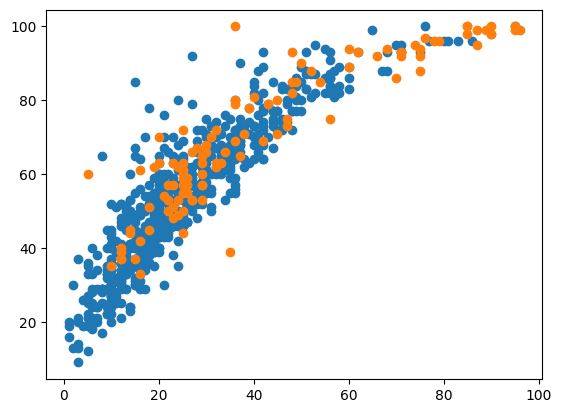

In [739]:
initial_centroids = np.zeros((2, len(X.columns)))
initial_centroids[0] = np.array(X.iloc[2])
initial_centroids[1] = np.array(X.iloc[775])
run_KMeans(np.array(X), initial_centroids, 10000, True)